In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

Using TensorFlow backend.


In [2]:
vggmodel = applications.VGG16(include_top=False, weights='imagenet')

In [3]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# you are passing your images through the pretrained vgg network
# all the way up until the fully connected layers

generator = datagen.flow_from_directory('data/train',
                                       target_size=(150, 150),
                                       batch_size=16,
                                       class_mode=None,
                                       shuffle=False)

bottleneck_features_train = vggmodel.predict_generator(generator, 2000/16)

np.save(open('bottleneck_features_train.npy','wb'), bottleneck_features_train)


In [4]:
# reload the file that has been pre created and predicted on

# preload the training data and create the true output labels

train_data = np.load(open('bottleneck_features_train.npy','rb'))

train_labels = np.array([0]*1000 + [1]*1000)

In [5]:
train_data.shape

(2000, 4, 4, 512)

In [6]:
# test data to check your accuracy on

validation_data = np.load(open('bottleneck_features_validation.npy','rb'))

validation_labels = np.array([0]*400 + [1]*400)

In [22]:
# create your own fully connected network to make predictions on dog vs cat

model = Sequential()

model.add(Flatten(input_shape=(4,4,512)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [9]:
# define the loss function and the gradient descent function

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
# train on training data

model.fit(train_data, train_labels,
         epochs=30,
         batch_size=16,
         validation_data=(validation_data, validation_labels))

Train on 2000 samples, validate on 800 samples
Epoch 1/30
2000/2000 [==============================] - 5s - loss: 0.6488 - acc: 0.7580 - val_loss: 0.3440 - val_acc: 0.8237

# predict on your own image

In [12]:
import matplotlib.pyplot as plt
from scipy.misc import imresize

%matplotlib inline

In [13]:
# read in your image
img = plt.imread('dog.jpg')

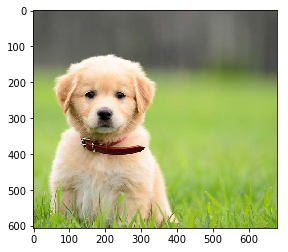

In [14]:
# show your image
plt.imshow(img)

In [15]:
# resize my image
img = imresize(img, (150,150,3))

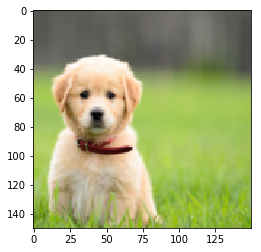

In [16]:
plt.imshow(img)

In [17]:
img.shape

(150, 150, 3)

In [18]:
# tells you there is one image in this set
img = np.expand_dims(img, axis=0)

In [19]:
img.shape

(1, 150, 150, 3)

In [20]:
convolved_img = vggmodel.predict(img,1)

In [21]:
convolved_img.shape

(1, 4, 4, 512)

In [24]:
new_dn_model = Sequential()

new_dn_model.add(Flatten(input_shape=(4,4,512)))
new_dn_model.add(Dense(256, activation='relu'))
new_dn_model.add(Dropout(0.5))
new_dn_model.add(Dense(1, activation='sigmoid'))

new_dn_model.load_weights('bottleneck_fc_model.h5')

In [25]:
new_dn_model.predict_classes(convolved_img)

1/1 [==============================] - 0s


array([[1]], dtype=int32)